In [4]:
import json
from itertools import product

with open('input.json','r') as f:
    data = json.load(f)
    
# Extract parameter values
parameters = data['parameters']

# Generate combinations
combinations = list(product(*(value if isinstance(value, list) else [value] for value in parameters.values())))

# Create dictionaries for each combination
result = []
for combo in combinations:
    dictionary = {key: value for key, value in zip(parameters.keys(), combo)}
    dictionary.update(data['defaults'])
    result.append(dictionary)

# Print the generated dictionaries
for dictionary in result:
    print(dictionary)

{'structure': 'KAXQIL', 'molecule_name': 'N2', 'pressure': 10, 'npoints': 5, 'temperature': 298.15, 'unit_cells': [1, 1, 1], 'FF': 'GenericMOFs'}
{'structure': 'KAXQIL', 'molecule_name': 'N2', 'pressure': 1000000.0, 'npoints': 5, 'temperature': 298.15, 'unit_cells': [1, 1, 1], 'FF': 'GenericMOFs'}
{'structure': 'KAXQIL', 'molecule_name': 'methane', 'pressure': 10, 'npoints': 5, 'temperature': 298.15, 'unit_cells': [1, 1, 1], 'FF': 'GenericMOFs'}
{'structure': 'KAXQIL', 'molecule_name': 'methane', 'pressure': 1000000.0, 'npoints': 5, 'temperature': 298.15, 'unit_cells': [1, 1, 1], 'FF': 'GenericMOFs'}


In [5]:
from src.wraspa2 import *
from input_parser import *

In [6]:
from ccdc.search import Search
from ccdc.search import TextNumericSearch
from ccdc import io

### Search all CSD entries given the partial name of the compound

In [7]:
csd = io.EntryReader('CSD')

In [113]:
%%time
search = TextNumericSearch()
search.add_compound_name("HKUST")
result = search.search()

TypeError: search() got an unexpected keyword argument 'kind'

In [46]:
len(result)

30

### Search all CSD entries given the partial name of the CSD identifier

In [48]:
%%time
search = TextNumericSearch()
search.add_identifier("SABWAU")
results = search.search()

CPU times: user 699 ms, sys: 32.4 ms, total: 732 ms
Wall time: 728 ms


In [49]:
for result in results :
    print(result.identifier)

SABWAU
SABWAU01


In [53]:
result.crystal.to_string('cif')

"\n#######################################################################\n#\n#                 Cambridge Crystallographic Data Centre\n#                                CCDC \n#\n#######################################################################\n#\n# If this CIF has been generated from an entry in the Cambridge \n# Structural Database, then it will include bibliographic, chemical, \n# crystal, experimental, refinement or atomic coordinate data resulting \n# from the CCDC's data processing and validation procedures.\n#\n#######################################################################\n\ndata_SABWAU01\n_symmetry_cell_setting           monoclinic\n_symmetry_space_group_name_H-M   'P 21/c'\n_symmetry_Int_Tables_number      14\n_space_group_name_Hall           '-P 2ybc'\nloop_\n_symmetry_equiv_pos_site_id\n_symmetry_equiv_pos_as_xyz\n1 x,y,z\n2 -x,1/2+y,1/2-z\n3 -x,-y,-z\n4 x,1/2-y,1/2+z\n_cell_length_a                   19.50417(25)\n_cell_length_b                   15.20143(

### parse output

In [122]:
from src.output_parser import *

In [123]:
import pandas as pd

In [124]:
gas ='N2'

In [125]:
list_files  = glob.glob("data/simulations/KAXQIL*N2*/Output/System_0/*")

In [126]:
results = []
for filename in list_files:
    with open(filename,'r') as f:
        string_output = f.read() 
    results.append(parse(string_output))
    
uptakes = [[r['Thermo/Baro-stat NHC parameters']['External Pressure'][0],
            r["Number of molecules"][gas]
            ["Average loading absolute [cm^3 (STP)/cm^3 framework]"][0]]
           for r in results]

isotherm = pd.DataFrame(uptakes,columns=['pressure(Pa)','uptake(cm^3 (STP)/cm^3 framework)']).sort_values(by='pressure(Pa)')
isotherm['pressure(bar)']=isotherm['pressure(Pa)']/100000

/opt/.conda/envs/simple-adsorption-workflow/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1018: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = self.plt.cm.get_cmap(cmap)


<Axes: xlabel='pressure(bar)', ylabel='uptake(cm^3 (STP)/cm^3 framework)'>

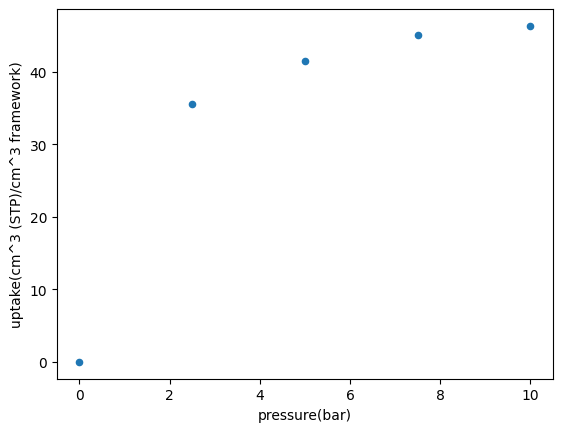

In [127]:
isotherm.plot(x='pressure(bar)',y='uptake(cm^3 (STP)/cm^3 framework)',kind='scatter')